# Seaborn 

[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)

**Seaborn** è una libreria Python per la visualizzazione dei dati, basata su **Matplotlib**.  
Offre un'interfaccia ad alto livello per creare grafici statistici belli e informativi.  
Ecco perché potresti preferire Seaborn rispetto a Matplotlib:

* **Sintassi semplificata**: meno codice per visualizzazioni complesse.
* **Temi predefiniti**: stili già pronti per grafici esteticamente gradevoli.
* **Gestione dei colori migliorata**: palette avanzate e facili da usare.
* **Grafici statistici**: supporta grafici avanzati come i box plot e i violin plot.
* **Supporto diretto ai DataFrame**: si integra facilmente con i `pandas.DataFrame`.
* **Stime automatiche**: ad esempio per la regressione lineare.
* **Faceting**: facile creazione di griglie di sottografi per confronti tra gruppi.



In [18]:
# Importazione librerie
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Barplot
- Mostra medie (o altre statistiche) di una variabile rispetto a categorie.
```python
sns.barplot(data=df, x='categoria', y='valore', estimator='mean')
```

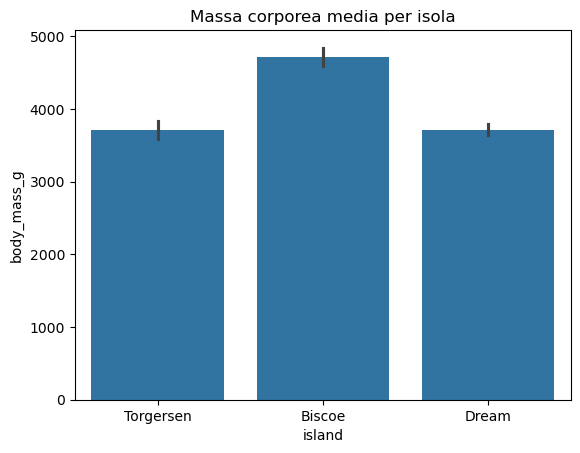

In [19]:
# Barplot con media della massa per isola
sns.barplot(data=df, x='island', y='body_mass_g', estimator='mean')
plt.title('Massa corporea media per isola')
plt.show()


### Istogrammi
- Mostra la distribuzione di una variabile continua.
- Opzionalmente può includere una curva KDE (densità stimata).
```python
sns.histplot(data=df, x='variabile', kde=True)
```

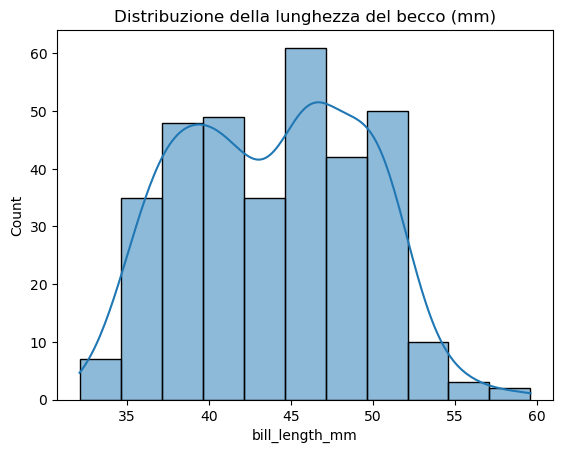

In [20]:
# Istogramma della distribuzione della lunghezza del becco
sns.histplot(data=df, x='bill_length_mm', kde=True)
plt.title('Distribuzione della lunghezza del becco (mm)')
plt.show()


L’istogramma mostra quanti dati ci sono in ogni intervallo (es. quante persone hanno tra 20 e 30 anni).
La curva KDE invece prova a stimare la distribuzione "vera" dei dati, senza dipendere dai bin dell’istogramma.

È come dire:

"Se i dati fossero distribuiti in modo continuo e liscio, ecco come apparirebbero."

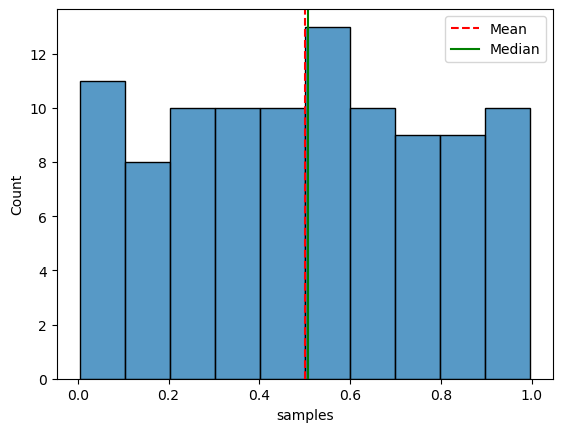

In [13]:
campione = np.random.uniform(low=0.0, high=1.0, size=100)
df = pd.DataFrame(campione, columns = ['samples'])
mean=df['samples'].mean()
median=df['samples'].median()

sns.histplot(df, x="samples", bins=10)
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.legend()


plt.show()

### Boxplot
Ti mostra dove si concentrano i dati, quanto sono sparsi e se ci sono valori anomali (outlier).
È composto da una scatola (box) e da due “baffi” che si estendono dai lati.

I **quantili** sono dei valori che **dividono i dati ordinati in parti uguali**:

- **Q1 (primo quartile)**: il 25% dei dati sta **sotto** questo valore  
- **Q2 (mediana)**: il 50% dei dati sta **sotto** questo valore  
- **Q3 (terzo quartile)**: il 75% dei dati sta **sotto** questo valore  

In pratica, dividono i dati in **quattro quarti** (da cui il nome *quartili*).

---

#### Cosa rappresenta un boxplot?

- La **scatola (box)** va da **Q1 a Q3** → rappresenta il **50% centrale** dei dati.  
- La **linea dentro il box** è la **mediana (Q2)** → cioè il valore centrale.  
- I **“baffi” (whiskers)** si estendono fino a un certo limite (di solito **1.5 × intervallo interquartile**, cioè `1.5 × (Q3 − Q1)`).  
- I **punti fuori dai baffi** sono considerati **outlier** → valori molto distanti dal resto.



```python
sns.boxplot(data=df, x='categoria', y='valore')
```

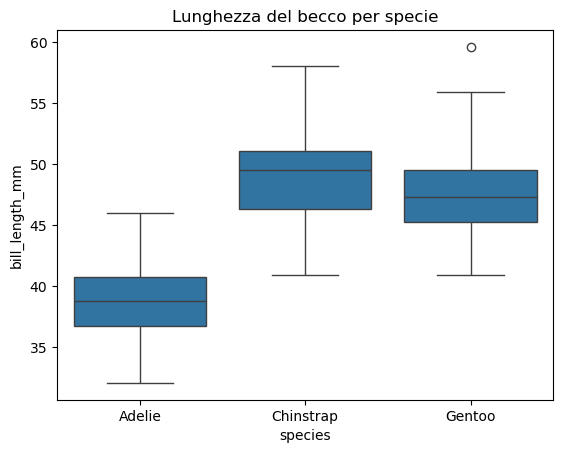

In [21]:
# Boxplot della lunghezza del becco per specie
sns.boxplot(data=df, x='species', y='bill_length_mm')
plt.title('Lunghezza del becco per specie')
plt.show()


/var/folders/98/2lfxkvhx40ldhrbg5c0920400000gp/T/ipykernel_31385/699309590.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


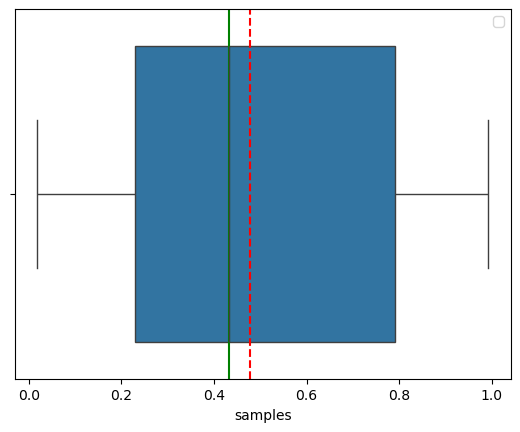

In [22]:
campione = np.random.uniform(low=0.0, high=1.0, size=100)
df = pd.DataFrame(campione, columns = ['samples'])
mean=df['samples'].mean()
median=df['samples'].median()

#sns.boxplot(data=df, x="samples", medianprops={"color": "green"})
sns.boxplot(data=df, x="samples")
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')

plt.legend()


plt.show()

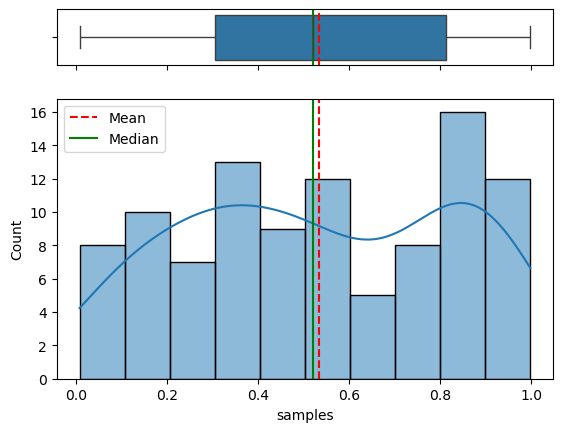

In [14]:
campione = np.random.uniform(low=0.0, high=1.0, size=100)
df = pd.DataFrame(campione, columns = ['samples'])

# costruisco una figura (f) che avrà due sottografici (subplot)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})

# calcolo la media e la mediana dei miei dati
mean=df['samples'].mean()
median=df['samples'].median()

sns.boxplot(data=df, x="samples", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(data=df, x="samples", ax=ax_hist, kde=True, bins=10)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()